In [1]:
!nvidia-smi

Fri Jan  5 10:01:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8               8W /  95W |    184MiB /  6144MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [27]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# 1. Import libraries

In [54]:
# Important library imports
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.imports import *
from fastai.vision.data import ImageDataLoaders
from PIL import Image
from fastai.vision.core import PILImage
import os
#import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
#from keras.preprocessing import image
import keras.utils as image
from keras.utils import load_img, img_to_array

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

# 2. Setting up path for training data

## a. Training data

In [2]:
x_train  = 'Training'
path_train = Path(x_train)
path_train.ls()

(#6) [Path('Training/Angry'),Path('Training/Fear'),Path('Training/Happy'),Path('Training/Neutral'),Path('Training/Sad'),Path('Training/Suprise')]

## b. Test data

In [3]:
x_test  = 'Testing'
path_test = Path(x_test)
path_test.ls()

(#6) [Path('Testing/Angry'),Path('Testing/Fear'),Path('Testing/Happy'),Path('Testing/Neutral'),Path('Testing/Sad'),Path('Testing/Suprise')]

# 3 Data Loading For training

In [15]:
# Load data
np.random.seed(40)
data = ImageDataLoaders.from_folder(path_train, train = '.', valid_pct=0.2,
                                  test = path_test,
                                  item_tfms=Resize(48))

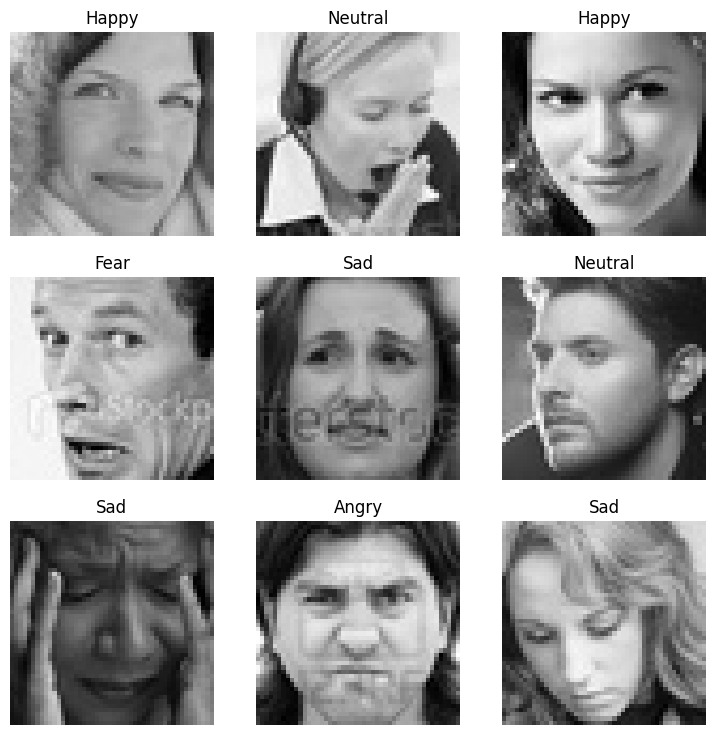

In [16]:
# Exploration of the data 
data.show_batch()

In [20]:
# Knowing more about the data
print('The dataset have: ' + str(data.c) + ' classes')
print('The training dataset has a size of: ' + str(len(data.train_ds)))
print('The validation dataset has a size of: ' + str(len(data.valid_ds)))

The dataset have: 6 classes
The training dataset has a size of: 22619
The validation dataset has a size of: 5654


# 4. Create the model

In [21]:
# ResNet18 CNN Model
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
C:\Users\mauii\anaconda3\envs\tfgpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Dow

# 5. Find LR

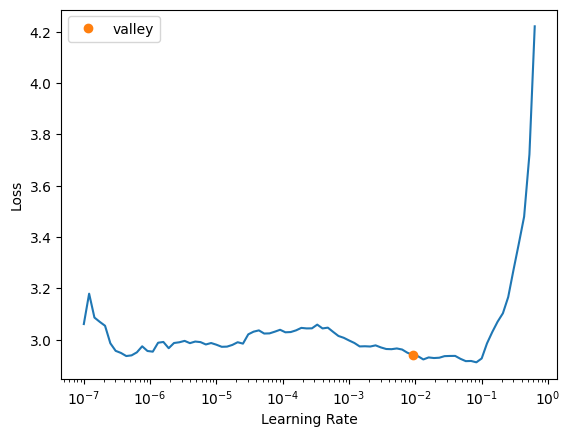

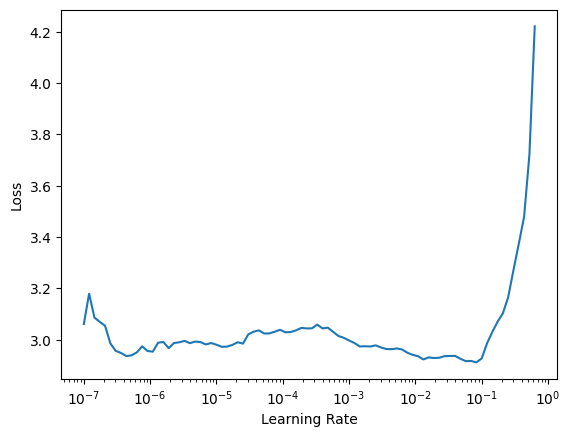

In [23]:
learn.lr_find()
learn.recorder.plot_lr_find()

# 6. Training Model

In [24]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.785187,1.701612,0.330209,04:06
1,1.595563,1.562132,0.388574,01:40
2,1.568598,1.516601,0.399010,01:40
3,1.576250,1.457671,0.453131,01:39
4,1.620574,1.595280,0.430138,01:39
5,1.680464,2.031070,0.433852,01:39
6,1.737868,1.527170,0.446233,01:39
7,1.656050,1.949878,0.435975,01:40
8,1.639313,1.603767,0.450478,01:39
9,1.640678,1.657269,0.419880,01:39


# 7. Hyper paramer

In [25]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.025472,1.391487,0.558189,04:10
1,1.034592,2.035522,0.563849,04:10
2,1.027215,1.118945,0.569331,04:09
3,0.965839,1.114533,0.582773,04:09
4,0.876396,1.119730,0.581181,04:09
5,0.737348,1.176718,0.588079,04:08
6,0.634337,1.222911,0.601521,04:09
7,0.517482,1.379679,0.590909,04:08
8,0.361304,1.560604,0.587726,04:09
9,0.276025,1.683541,0.596746,04:09


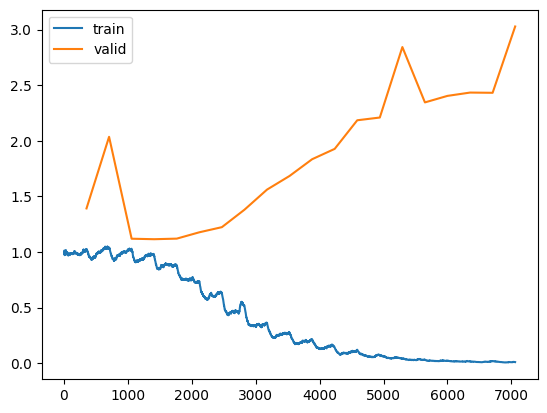

In [29]:
learn.recorder.plot_loss()

# 8. Interpret results

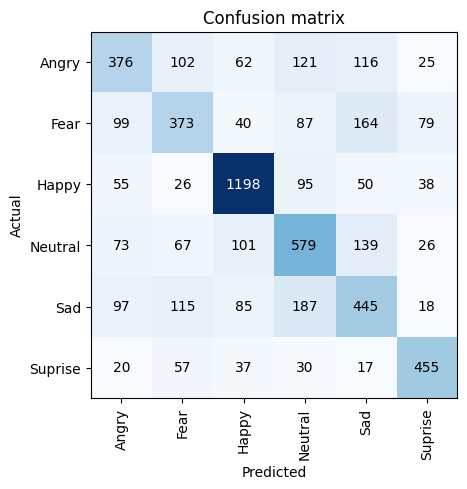

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

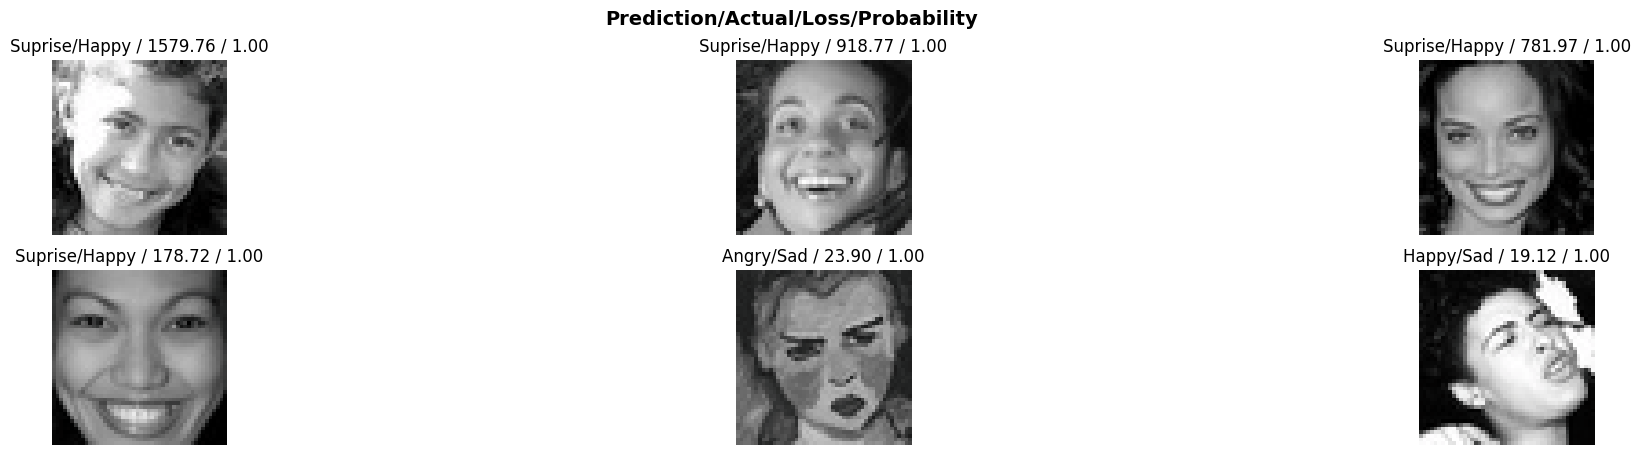

In [31]:
interp.plot_top_losses(6,figsize = (25,5))

# 9. Prediction Using Trained Model

In [78]:
#img = Image.open('Testing/Happy/Happy-1715.jpg')
#img = PILImage.create(Image.open('Testing/Happy/Happy-1715.jpg'))
#img.show()

print(learn.predict('Testing/Fear/Fear-10.jpg')[0])

Angry


# 10. Save and Load Model

In [85]:
learn.save('Facial_Recognition_V2')

Path('../kaggle/working/Facial_Recognition_V2.pth')